In [28]:
user_to_idx = {}
idx_to_user = []
data_user = []

movie_to_idx = {}
idx_to_movie = []
data_movie = []

import csv 
ratings = []
new_user_count = 0
new_movie_count = 0

with open('ratings.csv', 'r') as file :
    my_reader = csv.reader(file, delimiter=',')
    for i, row in enumerate(my_reader):
        if i == 0 :
            continue
        # ratings.append([int(row[0]),int(row[1]),float(row[2])])
        if int(row[0]) not in user_to_idx :
            user_to_idx[int(row[0])] = new_user_count
            data_user.append([])
            new_user_count += 1
            idx_to_user.append(int(row[0]))

        if int(row[1]) not in movie_to_idx :
            movie_to_idx[int(row[1])] = new_movie_count
            data_movie.append([])
            new_movie_count += 1
            idx_to_movie.append(int(row[1]))

            
        data_user[user_to_idx[int(row[0])]].append((movie_to_idx[int(row[1])],float(row[2])))
        data_movie[movie_to_idx[int(row[1])]].append((user_to_idx[int(row[0])],float(row[2])))

In [29]:
len(data_movie)

9724

In [30]:
len(data_user)

610

In [31]:
user_degree_counter = [] # we have to count the FREQUENCY of the degrees of the user
movie_degree_counter = [] # same goes for the movies

for elt in data_user:
  user_degree_counter.append(len(elt))

for elt in data_movie:
  movie_degree_counter.append(len(elt))

unique_user_degree = {}
unique_movie_degree = {}

for user_elt in user_degree_counter :
  if user_elt not in unique_user_degree :
    unique_user_degree[user_elt] = 0
  unique_user_degree[user_elt] += 1

for movie_elt in movie_degree_counter:
  if movie_elt not in unique_movie_degree:
    unique_movie_degree[movie_elt] = 0
  unique_movie_degree[movie_elt] += 1

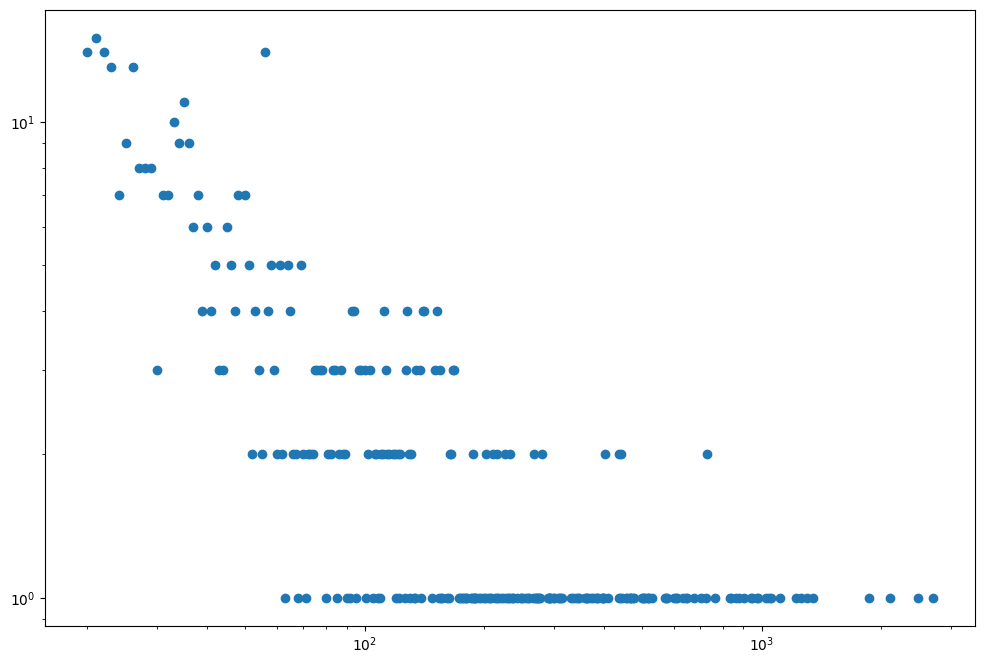

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(unique_user_degree.keys(), unique_user_degree.values())
plt.xscale('log')
plt.yscale('log')
plt.show()

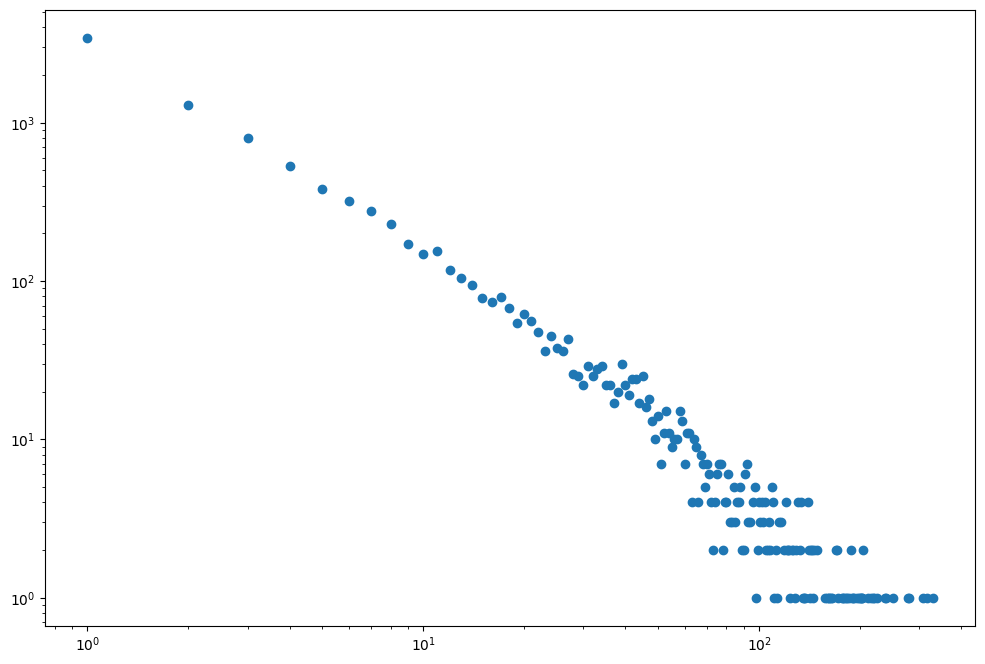

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(unique_movie_degree.keys(), unique_movie_degree.values())
plt.xscale('log')
plt.yscale('log')
plt.show()

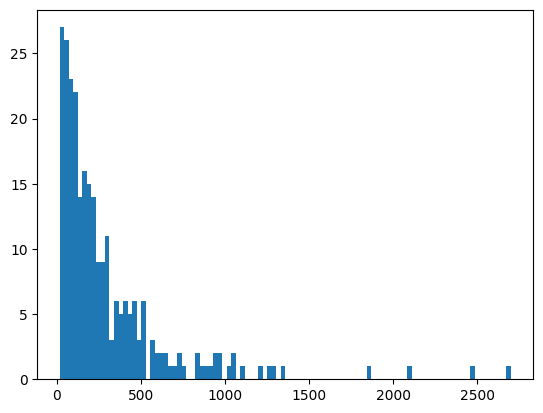

In [34]:
plt.hist(unique_user_degree, bins=100)
plt.show()

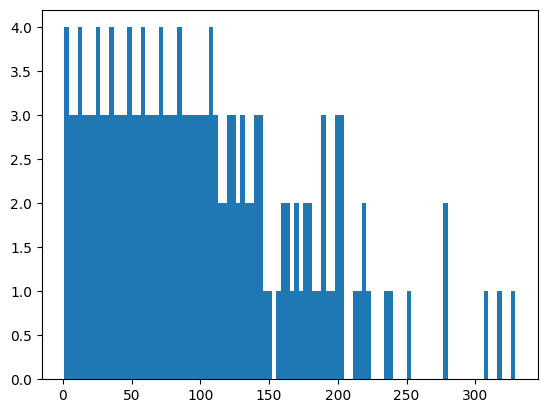

In [35]:
plt.hist(unique_movie_degree, bins=100)
plt.show()

**Splitting the dataset**

In [46]:
import random
import numpy as np
data_by_user_train = []
data_by_user_test = []
data_by_movie_train = []
data_by_movie_test = []

**Random split**

In [10]:
split_rate = 0.8
for i,user in enumerate(data_user):
    data_by_user_train.append([])
    data_by_user_test.append([])
    for content in user:
        if np.random.rand() <= split_rate :
            data_by_user_train[i].append(content)
        else :
            data_by_user_test[i].append(content)

for i,movie in enumerate(data_movie):
    data_by_movie_train.append([])
    data_by_movie_test.append([])
    for content in movie:
        if np.random.rand() <= split_rate :
            data_by_movie_train[i].append(content)
        else :
            data_by_movie_test[i].append(content)

**Not so random split**

In [47]:
split_rate = 0.8
for i, user in enumerate(data_user):
    data_by_user_train.append([])
    data_by_user_test.append([])
    lim = len(user)

    for content in user:
        curr_counter_user = 0
        if curr_counter_user / lim <= split_rate :
            data_by_user_train[i].append(content)
            curr_counter_user += 1 
        else :
            data_by_user_test[i].append(content)

for j,movie in enumerate(data_movie):
    data_by_movie_train.append([])
    data_by_movie_test.append([])
    lim = len(movie)
    
    for content in movie:
        curr_counter_movie = 0
        if curr_counter_movie / lim <= split_rate :
            data_by_movie_train[j].append(content)
            curr_counter_movie += 1 
        else :
            data_by_movie_test[j].append(content)

In [48]:
len(data_by_user_train)

610

In [49]:
len(data_by_user_train)/len(data_user)

1.0

In [50]:
len(data_by_movie_train)/len(data_movie)

1.0

In [61]:
n_iter = 10**3
M = len(data_user)
N = len(data_movie)
user_biases = np.zeros(M)
movie_biases = np.zeros(N)
error = []
error_tracker = []

# Hyperparameters
# p_lambda = 1.0
# p_gamma = 0.25
p_lambda = 1.0
p_gamma = 0.1

# Main loop
for iteration in range(n_iter):

    # For the movie
    for n in range(N):
        movie_bias = 0
        user_counter = 0
        for m,r in data_by_movie_train[n]:
            movie_bias += p_lambda * (r - user_biases[m])
            user_counter += 1
        movie_bias = movie_bias / (p_lambda * user_counter + p_gamma)
        movie_biases[n] = movie_bias

    # For the user
    for m in range(M):
        user_bias = 0
        item_counter = 0
        for n,r in data_by_user_train[m]:
            user_bias += p_lambda * (r - movie_biases[n])
            item_counter += 1
        user_bias = user_bias / (p_lambda * item_counter + p_gamma)
        user_biases[m] = user_bias

       

    if iteration == 0 or iteration % 10 == 0 or iteration % 25 == 0 :
        err = 0
        for user, user_bias in zip(data_by_user_test,user_biases):
            for movie_idx, rating in user:
                err += (rating - user_bias - movie_biases[movie_idx])**2
        err *= p_lambda/2
        err += (p_gamma/2) * (np.sum(user_biases**2) + np.sum(movie_biases**2))
        error_tracker.append(iteration)
        error.append(err)

In [62]:
error

[np.float64(5056.016644502677),
 np.float64(4344.53104025107),
 np.float64(3681.9898676320963),
 np.float64(3396.367292656996),
 np.float64(3137.425955812101),
 np.float64(2689.859685552957),
 np.float64(2322.0308570160087),
 np.float64(2019.7490428336496),
 np.float64(1771.3477722704263),
 np.float64(1664.2845674673445),
 np.float64(1567.2357454664398),
 np.float64(1399.5278340134225),
 np.float64(1261.7416843973758),
 np.float64(1148.54826209967),
 np.float64(1055.5667472387972),
 np.float64(1015.5035859942091),
 np.float64(979.1958972190243),
 np.float64(916.4753934337401),
 np.float64(864.9718415102758),
 np.float64(822.6850421662117),
 np.float64(787.9709288884442),
 np.float64(773.0214062297991),
 np.float64(759.4782092875507),
 np.float64(736.0962737401521),
 np.float64(716.912368054435),
 np.float64(701.1763830233499),
 np.float64(688.2719065524225),
 np.float64(682.7194659807943),
 np.float64(677.6924248180396),
 np.float64(669.0217568802105),
 np.float64(661.9179699497454),
 

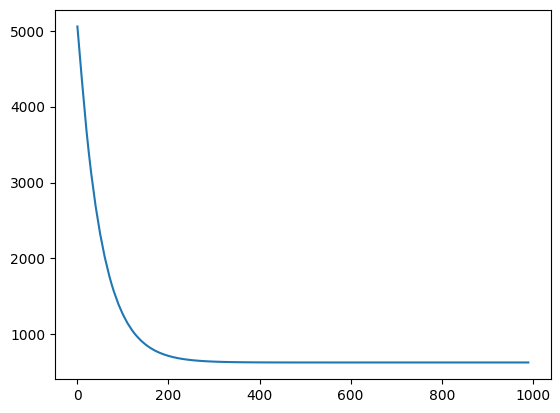

In [63]:
plt.plot(error_tracker, error)
plt.show()

In [64]:
movie_biases

array([ 0.70511189, -0.00515828,  0.75295771, ..., -0.36594178,
        0.08860368,  0.08860368])

In [65]:
user_biases

array([3.9686479 , 3.15239101, 1.73746849, 2.91375373, 3.10359449,
       3.50933537, 2.83726837, 3.2080634 , 3.01249281, 2.90811094,
       3.56011734, 4.22393281, 3.35859709, 3.17906067, 2.86910909,
       2.85484941, 3.3973824 , 3.21269695, 2.54983185, 3.34473908,
       3.02384232, 1.90567055, 2.79914111, 3.09174716, 3.98429347,
       2.89604246, 3.18558711, 2.49750487, 3.42240555, 3.91416689,
       3.50755261, 3.40649002, 3.24482447, 3.05896672, 3.77795939,
       2.28091436, 3.70769018, 2.93734466, 3.3102905 , 3.58385246,
       2.63597316, 3.45320383, 4.50792217, 3.26444732, 3.60034464,
       3.74685427, 2.515125  , 3.66140658, 3.47626227, 2.20012882,
       3.5732071 , 3.86424475, 4.66540164, 2.54618928, 2.34304835,
       3.57410935, 3.00493037, 3.64201428, 3.66706425, 3.19276889,
       3.31627209, 3.612196  , 2.97770365, 3.32605386, 3.2365154 ,
       3.58588404, 3.19776718, 2.91885283, 3.82341687, 3.52971414,
       3.34769716, 3.51362502, 3.32795734, 3.50936943, 2.60993